# Example: YahooFinance Part I - Time-Series Financial Data

[`yfinance`](https://pypi.org/project/yfinance/) is a powerful Python library that provides an easy-to-use interface to access financial data from [Yahoo Finance](https://finance.yahoo.com). It allows users to download historical market data, access real-time stock prices, retrieve company financials, and much more. This library is particularly useful for students, researchers, and professionals who need to perform financial analysis, backtest trading strategies, or explore the financial health of companies.

## Key Capabilities of `yfinance`:

1. **<span style="color: #ac0000;">Time-Series Financial Data:</span>**
- Download historical stock prices (OHLCV - Open, High, Low, Close, Volume) for various time intervals (daily, weekly, monthly).
- Access adjusted close prices, which account for dividends and stock splits.
- Retrieve real-time data and intraday data (up to 1-minute intervals).

![YahooFinance: Data Frequency and Availability](figs/Jupyter_YahooFinance_freq_availability.png)

2. **<span style="color: #8070fe;">Company Financials and Fundamentals:</span>**
- Retrieve company financial statements, including income statements, balance sheets, and cash flow statements.
- Access company information such as market capitalization, P/E ratio, dividend yield, and more.
- Explore analysts' recommendations and earnings history.

3. **<span style="color: #8070fe;">Sustainability Data (ESG Scores):</span>**
- Obtain environmental, social, and governance (ESG) scores, which provide insights into a company's sustainability practices.
- Access additional sustainability-related metrics and controversies associated with companies.

4. **<span style="color: #8070fe;">Corporate Actions and Events:</span>**
- Get data on dividends, stock splits, and other corporate actions.
- Retrieve information on major events, such as earnings releases, that can impact stock prices.

This notebook will introduce the basics of using `yfinance` to retrieve and analyze time-series financial data. Students will learn how to download historical stock prices, work with different time intervals, and explore the importance of adjusted close prices. The notebook will also cover basic data manipulation techniques in `pandas` to prepare time-series data for analysis.

## Getting Started with `yfinance`

**install** vs **import**: 
- When you say `!pip install <module_name>` you ask the system to **install** the module on your computer from available sources. 
- When you **import** the module into your script with `import <module_name>` it asks python to import the library available in the computer.
- If the library (module) is not present in the computer, it will give you an error and ask you to install it. So `pip` is to install modules on your computer and `import` is to used to load modules already present in your computer to be used in scripts.
- *NOTE: As you are using JupyterLab or Jupyter Notebook, use `!pip install` as the **"!"** symbols tells JupyterLab to process this a system command.*

In [ ]:
# Install yfinance package (you only need to run it once in your 
!pip install yfinance

In [1]:
# Import necessary libraries:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Retrieve historical data for a single ticker:

In [3]:
# Define the ticker symbol
ticker = 'AAPL'

# Download the data
data = yf.download(ticker, start='2020-01-01', end='2024-07-26', auto_adjust=True) # auto_adjust=False --> raw prices (with splits/dividends unadjusted)

# Display the first few rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620819,72.681266,71.373196,71.627069,135480400
2020-01-03,71.914803,72.676431,71.689942,71.847102,146322800
2020-01-06,72.487854,72.526541,70.783256,71.034717,118387200
2020-01-07,72.146927,72.753808,71.926900,72.497514,108872000
2020-01-08,73.307510,73.609745,71.849533,71.849533,132079200


## Downloading Historical Data

### Download daily, weekly, and monthly data:

In [4]:
# Daily data
daily_data = yf.download(ticker, start='2020-01-01', end='2024-07-26', interval='1d')

# Weekly data
weekly_data = yf.download(ticker, start='2020-01-01', end='2024-07-26', interval='1wk')

# Monthly data
monthly_data = yf.download(ticker, start='2020-01-01', end='2024-07-26', interval='1mo')

# Display the head of each data frame
print("Daily Data:\n", daily_data.head())
print("Weekly Data:\n", weekly_data.head())
print("Monthly Data:\n", monthly_data.head())

C:\Users\Vitali\AppData\Local\Temp\ipykernel_25116\1555380060.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  daily_data = yf.download(ticker, start='2020-01-01', end='2024-07-26', interval='1d')
[*********************100%***********************]  1 of 1 completed
C:\Users\Vitali\AppData\Local\Temp\ipykernel_25116\1555380060.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  weekly_data = yf.download(ticker, start='2020-01-01', end='2024-07-26', interval='1wk')
[*********************100%***********************]  1 of 1 completed
C:\Users\Vitali\AppData\Local\Temp\ipykernel_25116\1555380060.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  monthly_data = yf.download(ticker, start='2020-01-01', end='2024-07-26', interval='1mo')
[*********************100%***********************]  1 of 1 completed

Daily Data:
 Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620819  72.681266  71.373196  71.627069  135480400
2020-01-03  71.914803  72.676431  71.689942  71.847102  146322800
2020-01-06  72.487854  72.526541  70.783256  71.034717  118387200
2020-01-07  72.146927  72.753808  71.926900  72.497514  108872000
2020-01-08  73.307510  73.609745  71.849533  71.849533  132079200
Weekly Data:
 Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-01  72.146942  72.753823  70.783258  71.627093  509062400
2020-01-08  75.602074  76.784417  71.849536  71.849536  726318800
2020-01-15  76.542641  77.135015  74.845288  75.401404  479412400
2020-01-22  76.813423  78.177100  73.716128  77.0

### Retrieve and interpret adjusted close prices:
Adjusted close prices are used for historical comparisons because they account for dividends and stock splits.

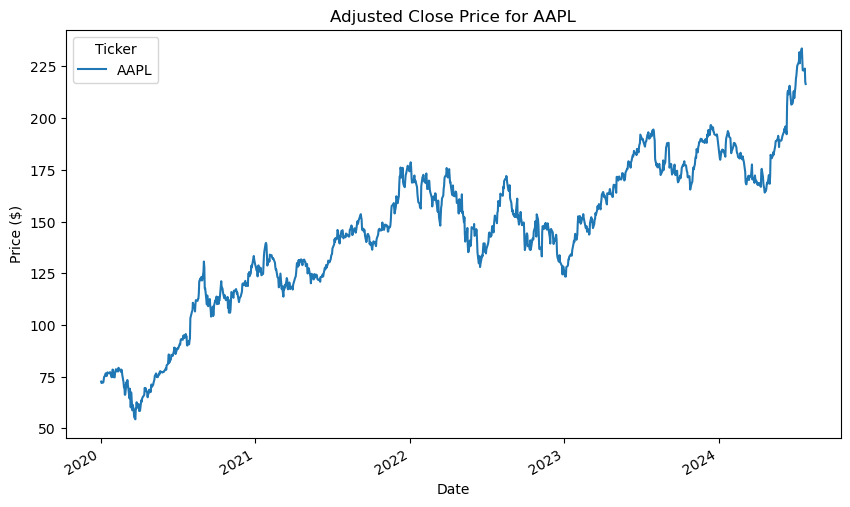

In [6]:
# Adjusted Close Prices
adj_close = data['Close']

# Plot the adjusted close prices
adj_close.plot(title='Adjusted Close Price for AAPL', figsize=(10, 6))
plt.ylabel('Price ($)')
plt.show()

## Working with Multiple Tickers

### Retrieve data for multiple tickers:

#### Option A: Read the list of tickers from a file

In [7]:
# Open the file in read mode
with open('data/stock_symbol_list.txt', 'r') as file:
    # Read each line and strip any leading/trailing whitespace characters (like newlines)
    tickers = [line.strip() for line in file]

# print to verify
print(tickers)

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'HON', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'AMGN', 'VZ', 'V', 'WMT', 'WBA', 'DIS']


In [8]:
import csv

# Open the CSV file in read mode
with open('data/stock_symbol_list.csv', 'r') as file:
    # Read the content using csv.reader
    reader = csv.reader(file)
    
    # Extract the first row (assuming there's only one row)
    tickers = next(reader)

# print to verify
print(tickers)

['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'HON', 'XOM', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'AMGN', 'VZ', 'V', 'WMT', 'WBA', 'DIS']


#### Option B: Scrape the list of tickers from a wikipedia page

In [ ]:
# Try with LLM on https://en.wikipedia.org/wiki/List_of_S%26P_500_companies


#### Option C: Define a list manually

In [9]:
# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
tickers

['AAPL', 'MSFT', 'GOOGL', 'AMZN']

### Download data for multiple tickers
Now that you have a variable `tickers` containing a list of multiple tickers for stocks you have selected, you can download the historical time-series for these assets:

In [19]:
# Download data for multiple tickers
multi_data = yf.download(tickers, start='2020-01-01', end='2024-07-26')

# Display the first few rows
multi_data.head()

C:\Users\Vitali\AppData\Local\Temp\ipykernel_25116\4268344884.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  multi_data = yf.download(tickers, start='2020-01-01', end='2024-07-26')
[*********************100%***********************]  4 of 4 completed


Price           Close                                         High             \
Ticker           AAPL       AMZN      GOOGL        MSFT       AAPL       AMZN   
Date                                                                            
2020-01-02  72.620819  94.900497  68.026024  153.042313  72.681266  94.900497   
2020-01-03  71.914803  93.748497  67.670158  151.136658  72.676431  94.309998   
2020-01-06  72.487854  95.143997  69.473846  151.527298  72.526541  95.184502   
2020-01-07  72.146927  95.343002  69.339645  150.145737  72.753808  95.694504   
2020-01-08  73.307510  94.598503  69.833191  152.537262  73.609745  95.550003   

Price                                    Low                        \
Ticker          GOOGL        MSFT       AAPL       AMZN      GOOGL   
Date                                                                 
2020-01-02  68.026024  153.147124  71.373196  93.207497  66.923141   
2020-01-03  68.278016  152.403913  71.689942  93.224998  66.964392   
2020-01-06  69.499192  151.594002  70.783256  93.000000  67.147300   
2020-01-07  69.756647  152.137132  71.926900  94.601997  69.163206   
2020-01-08  70.171661  153.213772  71.849533  94.321999  69.216391   

Price                        Open                                    \
Ticker            MSFT       AAPL       AMZN      GOOGL        MSFT   
Date                                                                  
2020-01-02  150.860356  71.627069  93.750000  67.018569  151.289123   
2020-01-03  150.603080  71.847102  93.224998  66.998193  150.850823   
2020-01-06  149.126182  71.034717  93.000000  67.178606  149.669298   
2020-01-07  149.898008  72.497514  95.224998  69.605552  151.803653   
2020-01-08  150.498224  71.849533  94.902000  69.325236  151.431985   

Price          Volume                                
Ticker           AAPL      AMZN     GOOGL      MSFT  
Date                                                 
2020-01-02  135480400  80580000  27278000  22622100  
2020-01-03  146322800  75288000  23408000  21116200  
2020-01-06  118387200  81236000  46768000  20813700  
2020-01-07  108872000  80898000  34330000  21634100  
2020-01-08  132079200  70160000  35314000  27746500

### Handling missing data and aligning time series:
Missing data can occur due to holidays or data unavailability; forward filling (`ffill`) is a common technique to handle this.

In [20]:
# Handling missing data by forward filling
multi_data_ffill = multi_data.ffill()

# Display the first few rows after filling missing data
multi_data_ffill.head()

Price           Close                                         High             \
Ticker           AAPL       AMZN      GOOGL        MSFT       AAPL       AMZN   
Date                                                                            
2020-01-02  72.620819  94.900497  68.026024  153.042313  72.681266  94.900497   
2020-01-03  71.914803  93.748497  67.670158  151.136658  72.676431  94.309998   
2020-01-06  72.487854  95.143997  69.473846  151.527298  72.526541  95.184502   
2020-01-07  72.146927  95.343002  69.339645  150.145737  72.753808  95.694504   
2020-01-08  73.307510  94.598503  69.833191  152.537262  73.609745  95.550003   

Price                                    Low                        \
Ticker          GOOGL        MSFT       AAPL       AMZN      GOOGL   
Date                                                                 
2020-01-02  68.026024  153.147124  71.373196  93.207497  66.923141   
2020-01-03  68.278016  152.403913  71.689942  93.224998  66.964392   
2020-01-06  69.499192  151.594002  70.783256  93.000000  67.147300   
2020-01-07  69.756647  152.137132  71.926900  94.601997  69.163206   
2020-01-08  70.171661  153.213772  71.849533  94.321999  69.216391   

Price                        Open                                    \
Ticker            MSFT       AAPL       AMZN      GOOGL        MSFT   
Date                                                                  
2020-01-02  150.860356  71.627069  93.750000  67.018569  151.289123   
2020-01-03  150.603080  71.847102  93.224998  66.998193  150.850823   
2020-01-06  149.126182  71.034717  93.000000  67.178606  149.669298   
2020-01-07  149.898008  72.497514  95.224998  69.605552  151.803653   
2020-01-08  150.498224  71.849533  94.902000  69.325236  151.431985   

Price          Volume                                
Ticker           AAPL      AMZN     GOOGL      MSFT  
Date                                                 
2020-01-02  135480400  80580000  27278000  22622100  
2020-01-03  146322800  75288000  23408000  21116200  
2020-01-06  118387200  81236000  46768000  20813700  
2020-01-07  108872000  80898000  34330000  21634100  
2020-01-08  132079200  70160000  35314000  27746500

## Basic Time-Series Analysis
Perform basic time-series analysis, such as plotting stock prices, calculating moving averages, and other rolling analysis.

### Comparing multiple stocks in a single plot

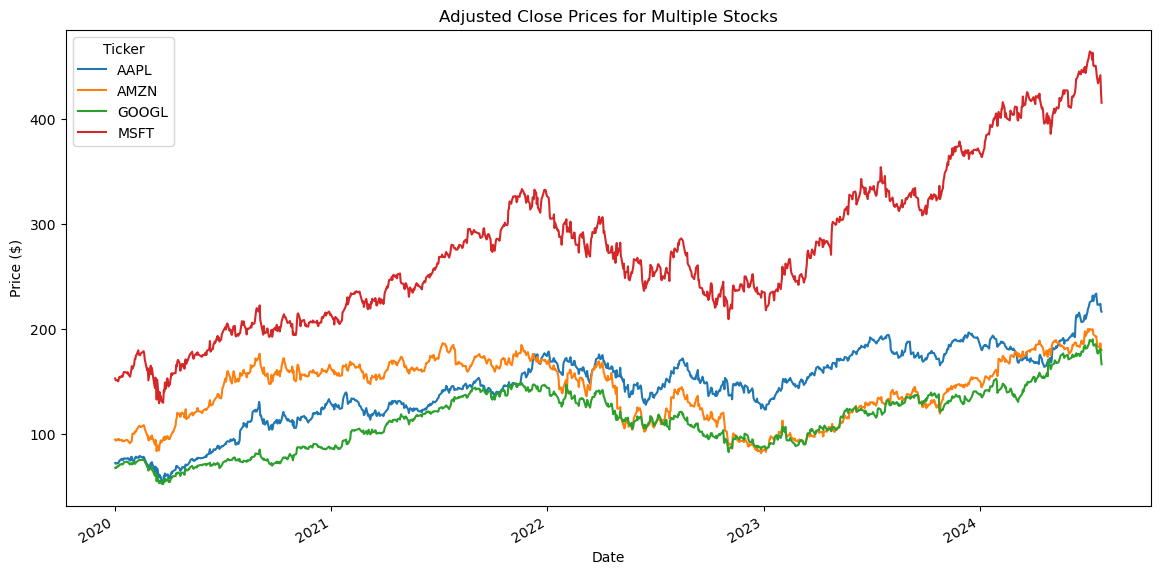

In [21]:
# Plotting the closing prices of multiple stocks
multi_data['Close'].plot(title='Adjusted Close Prices for Multiple Stocks', figsize=(14, 7))
plt.ylabel('Price ($)')
plt.show()

### Calculating and visualizing simple moving averages:
Moving averages are used to smooth out short-term fluctuations and highlight longer-term trends.

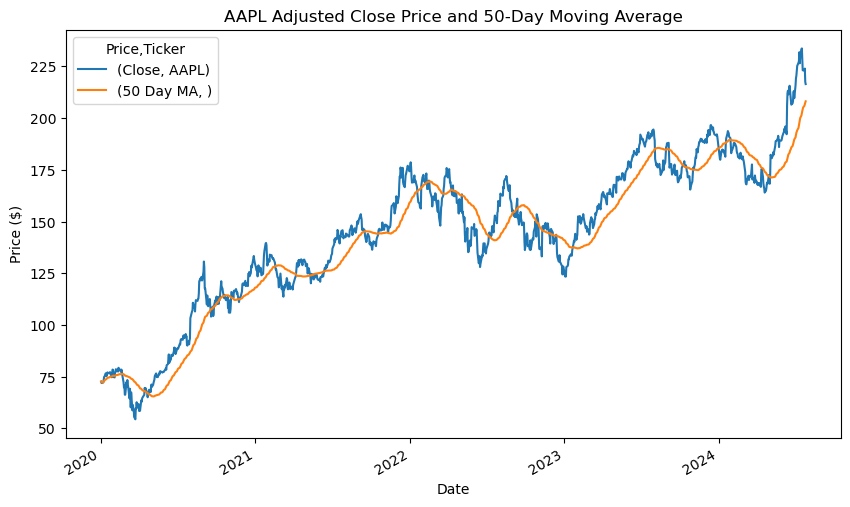

In [38]:
# Calculate a 50-day moving average for AAPL
data['50 Day MA'] = data[('Close','AAPL')].rolling(window=50, min_periods=1).mean()

# Plot the adjusted close prices and the 50-day moving average
data[['Close', '50 Day MA']].plot(title='AAPL Adjusted Close Price and 50-Day Moving Average', figsize=(10, 6))
plt.ylabel('Price ($)')
plt.show()